In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab"

Mounted at /content/drive
/content/drive/My Drive/Colab


In [ ]:
import pandas as pd
import io
import numpy as np
import tensorflow as tf
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from scipy import stats
from tensorflow import keras

In [ ]:
df=pd.read_csv('titanic.csv')
print(df)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df = df[['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']]
titanic_df.head()

,Survived,Pclass,SibSp,Parch,Fare
0,0,3,1,0,7.2500
1,1,1,1,0,71.2833
2,1,3,0,0,7.9250
3,1,1,1,0,53.1000
4,0,3,0,0,8.0500


In [ ]:
X = np.asarray(titanic_df[['Pclass', 'SibSp', 'Parch', 'Fare']])
X[0:5]

array([[ 3.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    ,  0.    , 53.1   ],
       [ 3.    ,  0.    ,  0.    ,  8.05  ]])

In [ ]:
y = np.asarray(titanic_df['Survived'])
y [0:5]

array([0, 1, 1, 1, 0])

In [ ]:
X=stats.zscore(X)
X[0:5]

array([[ 0.82737724,  0.43279337, -0.47367361, -0.50244517],
       [-1.56610693,  0.43279337, -0.47367361,  0.78684529],
       [ 0.82737724, -0.4745452 , -0.47367361, -0.48885426],
       [-1.56610693,  0.43279337, -0.47367361,  0.42073024],
       [ 0.82737724, -0.4745452 , -0.47367361, -0.48633742]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=30)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 4) (712,)
Test set: (179, 4) (179,)


In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
ann.fit(X_train,y_train,batch_size=32,epochs = 200)

Epoch 1/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5513 - accuracy: 0.7289
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5505 - accuracy: 0.7289
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5505 - accuracy: 0.7289
Epoch 4/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7303
Epoch 5/200
23/23 [==============================] - 0s 3ms/step - loss: 0.5507 - accuracy: 0.7303
Epoch 6/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7317
Epoch 7/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5506 - accuracy: 0.7303
Epoch 8/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7303
Epoch 9/200
23/23 [==============================] - 0s 3ms/step - loss: 0.5506 - accuracy: 0.7275
Epoch 10/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.7317
Epoch 11/

In [ ]:
y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)
#y_pred=y_pred.astype(int)
y_pred

array([[ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [ ]:
y_pred=ann.predict(X_test)
#y_pred=(y_pred>0.5)
#y_pred=y_pred.astype(int)
y_pred

array([[0.9324329 ],
       [0.8768449 ],
       [0.2031182 ],
       [0.7007582 ],
       [0.70658684],
       [0.20229161],
       [0.8885407 ],
       [0.2031182 ],
       [0.20229161],
       [0.20236042],
       [0.46103287],
       [0.41193557],
       [0.25269234],
       [0.20575243],
       [0.843573  ],
       [0.31779227],
       [0.20241764],
       [0.20481369],
       [0.20277354],
       [0.316106  ],
       [0.31133306],
       [0.20241764],
       [0.34764677],
       [0.06270161],
       [0.67841285],
       [0.2000381 ],
       [0.88771975],
       [0.20045778],
       [0.23014218],
       [0.20269305],
       [0.86753017],
       [0.52458686],
       [0.19930533],
       [0.01401865],
       [0.20269305],
       [0.2000381 ],
       [0.31519997],
       [0.8768449 ],
       [0.207149  ],
       [0.28152162],
       [0.35316682],
       [0.31747222],
       [0.20229161],
       [0.15576077],
       [0.31133306],
       [0.30485082],
       [0.8039942 ],
       [0.202

** implementing Support Vector Machine (SVM)**

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [ ]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 0, 1, 1])

In [ ]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.6815642458100558


**Modellling - Logistic Regression**

In [ ]:
LR = LogisticRegression().fit(X_train,y_train)

In [ ]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0])

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.45239648, 0.54760352],
       [0.36863286, 0.63136714],
       [0.76339361, 0.23660639],
       [0.4224978 , 0.5775022 ],
       [0.53781597, 0.46218403],
       [0.76362414, 0.23637586],
       [0.31245342, 0.68754658],
       [0.76339361, 0.23660639],
       [0.76362414, 0.23637586],
       [0.76360493, 0.23639507],
       [0.71910951, 0.28089049],
       [0.41034846, 0.58965154],
       [0.78778014, 0.21221986],
       [0.76266256, 0.23733744],
       [0.39945976, 0.60054024],
       [0.60868075, 0.39131925],
       [0.76358895, 0.23641105],
       [0.76292245, 0.23707755],
       [0.76348968, 0.23651032],
       [0.60933944, 0.39066056],
       [0.61121201, 0.38878799],
       [0.76358895, 0.23641105],
       [0.5954265 , 0.4045735 ],
       [0.74218443, 0.25781557],
       [0.42540795, 0.57459205],
       [0.76410392, 0.23589608],
       [0.3420386 , 0.6579614 ],
       [0.7640272 , 0.2359728 ],
       [0.75839968, 0.24160032],
       [0.76351212, 0.23648788],
       [0.

In [ ]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.6536312849162011


**Implementing ANN linear regression model using TensorFlow**

In [ ]:
df1 = pd.read_csv('FuelConsumption.csv')
print(df1)

      MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0 

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [ ]:
X = np.asarray(df1[['CYLINDERS']])
X[0:5]

array([[4],
       [4],
       [4],
       [6],
       [6]])

In [ ]:
y = np.asarray(df1['CO2EMISSIONS'])
y [0:5]

array([196, 221, 136, 255, 244])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (853, 1) (853,)
Test set: (214, 1) (214,)


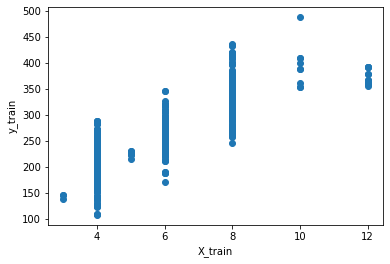

In [ ]:
plt.xlabel('X_train') 
plt.ylabel('y_train') 
plt.scatter(X_train, y_train)
plt.show()

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(units=1))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss='mean_squared_error', optimizer=opt)

In [ ]:
history = model.fit(X_train,y_train, epochs=100)

Epoch 1/100
27/27 [==============================] - 1s 3ms/step - loss: 69001.3750
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 59648.8867
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 51281.3633
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 43835.1758
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 37273.9922
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 31542.0625
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 26556.2305
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 22234.5234
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 18519.6211
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 15354.0537
Epoch 11/100
27/27 [==============================] - 0s 3ms/step - loss: 12696.8643
Epoch 12/100
27/27 [==============================] - 0s 3ms/step - loss: 

In [ ]:
# Prediction
print('Prediction: {}'.format(model.predict([3.5])))

Prediction: [[155.56686]]


weight: [35.074] bias: [50.344868]


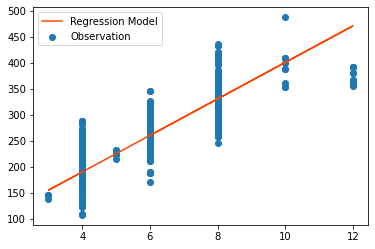

In [ ]:
# Get weight and bias
weights = model.get_weights()
weight = weights[0][0]
bias = weights[1]
print('weight: {} bias: {}'.format(weight, bias))
y_learned = X_train * weight + bias 
plt.scatter(X_train, y_train, label='Observation')
plt.plot(X_train, y_learned, color='orangered', label='Regression Model')
plt.legend() 
plt.show()

In [ ]:
from sklearn.metrics import r2_score
test_y_ = model.predict(X_test)

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_-y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_-y_test)**2))
print("R2-score: %.2f" % r2_score(test_y_,y_test))

Mean absolute error: 68.59
Residual sum of squares (MSE): 7544.14
R2-score: 0.65
